In [4]:
import numpy as np
import pandas as pd
import tweepy
import math
import json
from textblob import TextBlob
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
%matplotlib inline
import seaborn as sns

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
def percentage(part, whole):
  return 100* (float(part)/float(whole)) 
consumer_key ='MqL6H8HqwJF9uzgruxzwvFxqZ'
consumer_secret='5QCJQ0sIQdDXvXdhRdo2xrEnfo3y5AUSW5hKD2Ze9FREjM7Flq'
access_token='303034057-0TKtDa4Cc5ktljoVPqzqAIjN12ndMAOUjlJK0ANP'
access_token_secret='oAhFhKtluflyJYUvFzIBDLiNh6zwES9V3hyS5gXIGUWfG'
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth)


In [6]:
searchTerm = "christmas"
numofSearch = int(100)


In [7]:
tweets = tweepy.Cursor(api.search, q=searchTerm, lang="English").items(numofSearch)
#tweets
#tweetsdf <- twListToDF(tweets)
#write.csv(tweetsdf, file='~/Desktop/christmas.csv', row.names=F)
arr = [] 
print(tweets)

In [8]:
positive=0
p=[]
negative=0
total = 0
neutral=0
polarity=0
corpus = []
for tweet in tweets:
    print(tweet.text)
    review = tweet.text
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    #corpus.append(review)

    
    analysis = TextBlob(tweet.text)
    if (analysis.sentiment.polarity ==0):
      neutral +=1
      total+=1
      #p.append(0)
    elif (analysis.sentiment.polarity<0.00):
       negative +=1
       p.append(-1)
       total+=1
       corpus.append(review)
    elif (analysis.sentiment.polarity>0.00):
      positive +=1 
      total+=1
      p.append(1)
      corpus.append(review)

#Taihape Mt Ruapehu #NouvelleZelande: Feilding's Living Christmas 21 Dec 2018 https://t.co/KFmQ8ZdlM5 https://t.co/8TyCjjYTxj
PalmerstonNorth #MtRuapehu #NewZealand: Movie Night and Christmas 21 Dec 2018 https://t.co/RFlIKgTCMM https://t.co/AG8xwyT9ux
#Masterton Wairarapa #NewZealand: Christmas Party With Just N Time 21 Dec 2018 https://t.co/HDHkc1Ez8i https://t.co/TdtQDRGPbV
#Whangarei Northland #NouvelleZelande: Naughty North Comedy Club - Christmas Special 20 Dec 2018… https://t.co/KxTPgWzTfB
#Napier Hawkes Bay #NewZealand: Napier City Christmas Late Night 20 Dec 2018 https://t.co/EAxTAEqWLm https://t.co/hPjNsK9BqR
#Christchurch #NewZealand: The Tannery Christmas Market 20 Dec 2018 https://t.co/Y3Ml7duMva https://t.co/OIpIZtae6H
#Whangarei Northland #NouvelleZelande: Ruakaka Christmas At the Races 18 Dec 2018 https://t.co/42yBiEgBAb https://t.co/9UJnbWZdH4
#Wellington #NouvelleZelande: Counsel in Concert: All I Want for Christmas... 18 Dec 2018 https://t.co/jsF3eKNbdz https://t.co/O

In [9]:
print (corpus)
print (p)
print (positive)
print (negative)
print (neutral)
print (total)


['#whangarei northland #nouvellezelande: naughti north comedi club - christma special 20 dec 2018… https://t.co/kxtpgwztfb', '#napier hawk bay #newzealand: napier citi christma late night 20 dec 2018 https://t.co/eaxtaeqwlm https://t.co/hpjnsk9bqr', 'rt @seomraranga: christma journey - free season onlin pictur book https://t.co/gtrypm9o6 #edchati https://t.co/vnlcpa9cii', "rt @seomraranga: schnitzel' first christma - free season onlin pictur book https://t.co/mzsanufqx #edchati https://t.co/sr3jmumnlb", "rt @seomraranga: waldo' christma surpris - onlin free season pictur book https://t.co/xtvqdedret #edchati https://t.co/f0k95luxz7", 'christma journey - free season onlin pictur book https://t.co/gtrypm9o6 #edchati https://t.co/vnlcpa9cii', "schnitzel' first christma - free season onlin pictur book https://t.co/mzsanufqx #edchati https://t.co/sr3jmumnlb", "waldo' christma surpris - onlin free season pictur book https://t.co/xtvqdedret #edchati https://t.co/f0k95luxz7", 'dunedin #otago #

In [10]:
positive = percentage(positive,total)
negative = percentage(negative,total)
neutral = percentage(neutral,total)
positive=format(positive,'.2f')
negative=format(negative,'.2f')
neutral=format(neutral,'.2f')

In [11]:
print ("how pepole are reacting on "+searchTerm+" by analyzing "+str(numofSearch)+" tweets.")

if (polarity ==0):
    print ("neurtal")
elif (polarity<0):
    print("Negative")
elif (polarity >0):
    print("positive")

how pepole are reacting on christmas by analyzing 100 tweets.
neurtal


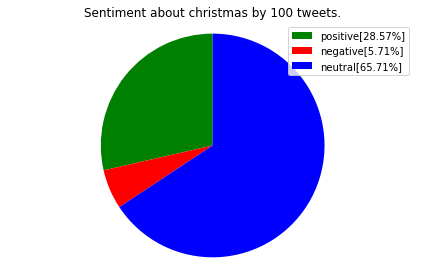

In [12]:
labels = ['positive['+str(positive)+'%]', 'negative['+str(negative)+'%]', 'neutral['+str(neutral)+'%]']
size = [positive,negative,neutral]
color = ['green','red','blue']
patches , text = plt.pie (size , colors=color,startangle=90)
plt.legend(patches,labels,loc="best")
plt.title('Sentiment about '+searchTerm+' by '+str(numofSearch)+' tweets.')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 100)
X = cv.fit_transform(corpus).toarray()
y = p

In [14]:
from sklearn.cross_validation import train_test_split

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [15]:
X_train, X_test, y_train, y_test = train_test_split( X , y , test_size=.5, random_state = 10)

In [16]:
from sklearn import naive_bayes

In [17]:
clf =naive_bayes.MultinomialNB()
clf.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [18]:
from sklearn.metrics import confusion_matrix, roc_auc_score

In [19]:
roc_auc_score(y_test,clf.predict_proba(X_test)[:,1])

1.0

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [21]:
logreg = DecisionTreeClassifier()

In [22]:
logreg.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [23]:
y_pred=logreg.predict(X_test)

In [24]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.8333333333333334


In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)

In [27]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [28]:
from sklearn import metrics

In [29]:
y_pred= forest.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
print(acc)

0.8333333333333334
